# Jupyter widgets
[Jupyter widgets](https://ipywidgets.readthedocs.io/en/latest/index.html) are visual components that enhance the interaction with a Jupyter notebook. In this notebook we test some of the widgets. 

In [1]:
import os
import numpy as np
from osgeo import gdal, osr, ogr
import matplotlib.pyplot as plt
from skimage import io
from skimage import exposure
from skimage.io import imsave, imread
#from rasterio.plot import show
from IPython.display import display
from ipywidgets import Checkbox, VBox, HBox, Layout, Text, Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
print("NumPy version: %s"%np.__version__)
print("GDAL version: %s"%gdal.__version__)
warnings.filterwarnings('ignore')

NumPy version: 1.26.4
GDAL version: 3.9.2


## Interact
It is a widget that returns the value of a function for each value of its arguments passed through the widget. The type of widget depends on the type of argument passed to the function. For example, if we pass an integer interval the widget used will be an integer slider.

In [2]:
def f(x):
    return x * x

In [3]:
w = interact(f, x=(0,9));

interactive(children=(IntSlider(value=4, description='x', max=9), Output()), _dom_classes=('widget-interact',)…

In [5]:
x = w.widget.children[0].get_state('value')['value']
x

4

In [6]:
f(x)

16

## Slider
We can use a slider widget to visually select an integer within an interval

In [7]:
slider = widgets.IntSlider(value=0, min=0, max=10, step=1)
display(slider)

IntSlider(value=0, max=10)

In [9]:
current_value = slider.value
print('Slider value: {:d}'.format(current_value))

Slider value: 5


We can connect our slider to a function f by passing it to the interact function

In [10]:
w = interact(f, x=slider)

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

In [11]:
x = w.widget.children[0].get_state('value')['value']
x

5

## Checkbox
Checkboxes are used to select from multiple elements from a collection, e.g. images.

In [12]:
c = widgets.Checkbox(value=False, description='Check me')
display(c)

Checkbox(value=False, description='Check me')

In [13]:
c.value

True

## Filtering out images from a collection 
We can use a checkbox to filter out images from a collection. We need to browse the images and to set a flag for those we want to eliminate from the collection. We use the interact function from which we call a function for the image visualization with the index of the image. We visualize a checkbox with each image to flag those that we want to eliminate . We create a list of checkboxes so that at the end of the process we will have the list of all the images to be eliminated.    

In [14]:
img_path = 'images/'
img_list = []
for file in os.listdir(img_path):
    if file.endswith(".tif"):
        img_list.append(os.path.join(img_path, file))

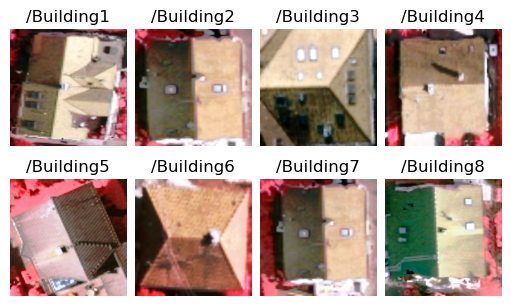

In [20]:
fig_rows = 2
fig_cols = 4
fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(5, 3), layout='constrained')
axs.flatten()
for i, ax in enumerate(axs.ravel()):
    img = imread(img_list[i])
    img_equalized = exposure.equalize_hist(img)
    title = img_list[i][-14:-4]
    ax.set_axis_off()
    ax.set_title(title)
    ax.imshow(img_equalized)

In [37]:
def browse_images(img_list):
    '''
    This function uses a widget to show and flag the images
    '''
    n = len(img_list)
    check_list = []
    for _ in range(n):
        check = widgets.Checkbox(description='Remove')
        check_list.append(check)
        
    def view_image(i):
        img_or = io.imread(img_list[i])
        img = exposure.equalize_hist(img_or)
        plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
        title = img_list[i][-10:-4]
        plt.title('%s' % title)
        display(check_list[i])
        plt.show()
    
    slider = widgets.IntSlider(value=0, min=0, max=n-1, step=1)
    interact(view_image, i = slider)
    return check_list

In [38]:
check_list = browse_images(img_list)

interactive(children=(IntSlider(value=0, description='i', max=7), Output()), _dom_classes=('widget-interact',)…

In [39]:
zip_list = list(zip(img_list, check_list))

In [40]:
for path, flag in zip_list:
    print(path, flag.value)

images/Building1.tif True
images/Building2.tif False
images/Building3.tif False
images/Building4.tif False
images/Building5.tif True
images/Building6.tif False
images/Building7.tif False
images/Building8.tif True
